单层的比较好理解。  
输入，比重。然后激活函数。最后输出。

激活函数，门外汉还是抄吧。
关键还是W的优化

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X=iris.data[:,(2,3)]
y= (iris.target==0)

pre_clf = Perceptron()
pre_clf.fit(X,y)
y_pred = pre_clf.predict([[2,0.5]])
y_pred

array([False])

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__,keras.__version__

('2.1.0', '2.2.4-tf')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000]/255.0,y_train_full[5000:]
class_names=["T-shirt/top","Trousr","pullover","Dress","Coat","Sandal","Shirt","sneaker","Bag","Ankle boot"]

In [5]:
class_names[y_train[0]]

'Coat'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation=keras.activations.relu))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers



In [8]:
hidden1 = model.layers[1]
weigts,biases = hidden1.get_weights()
weigts,biases

(array([[ 0.01543043,  0.02340439, -0.00697071, ...,  0.04402789,
         -0.0671961 , -0.03320573],
        [-0.06685816, -0.03372729,  0.03639385, ..., -0.00517566,
         -0.07036906,  0.03782356],
        [ 0.02568468,  0.04650786, -0.06985367, ..., -0.03483465,
          0.04178891,  0.04474244],
        ...,
        [-0.02011645, -0.02667988,  0.02039534, ..., -0.00849056,
          0.05223744, -0.07012933],
        [-0.03239337, -0.02405666, -0.06238921, ..., -0.04017675,
         -0.01686778, -0.02388421],
        [ 0.04471124,  0.06021695, -0.05601127, ..., -0.02846901,
          0.01770858, -0.00921233]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, decay=1e-6)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=opt,
              metrics=[keras.metrics.sparse_categorical_accuracy])


In [10]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 47us/sample - loss: 1.3752 - sparse_categorical_accuracy: 0.6025 - val_loss: 3.2674 - val_sparse_categorical_accuracy: 0.0750

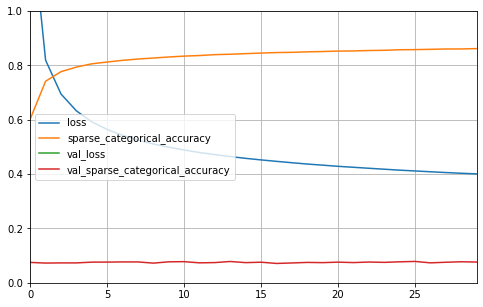

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
model.evaluate(X_test,y_test)


10000/10000 [==============================] - 0s 28us/sample - loss: 69.0011 - sparse_categorical_accuracy: 0.8228


[69.00105260162354, 0.8228]

In [13]:
X_new = X_test[:3]
y_proba = model.predict_proba(X_new)
y_proba


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'pullover', 'Trousr'], dtype='<U11')

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()


In [16]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 42us/sample - loss: 2.1490 - val_loss: 2.3790
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.8912 - val_loss: 0.7698
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.7513 - val_los

In [17]:
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4812


array([[1.7528183],
       [2.411275 ],
       [3.2244124]], dtype=float32)

In [18]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model= keras.Model(inputs=[input_],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [19]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)

model= keras.Model(inputs=[input_A,input_B],outputs=[output])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [20]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

history = model.fit((X_train_A,X_train_B),y_train,epochs=30,
                    validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 49us/sample - loss: 2.5133 - val_loss: 1.0318
Epoch 2/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.8241 - val_loss: 0.7344

In [21]:
y_pred

array([[1.5631046],
       [2.3785534],
       [3.2084222]], dtype=float32)

In [22]:
output = keras.layers.Dense(1,name="main_output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [23]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")
history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=30,
                    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 66us/sample - loss: 0.8564 - main_output_loss: 0.7991 - aux_output_loss: 1.3693 - val_loss: 3.3932 - val_main_output_loss: 3.4883 - val_aux_output_loss: 2.5217

In [24]:
total_loss,main_loss,aux_loss= model.evaluate([X_test_A,X_test_B],[y_test,y_test])
y_pred = model.predict((X_new_A,X_new_B))



5160/5160 [==============================] - 0s 19us/sample - loss: 0.3468 - main_output_loss: 0.3335 - aux_output_loss: 0.4717


In [25]:
y_pred



[array([[1.1913946],
        [2.0479198],
        [3.283091 ]], dtype=float32),
 array([[1.4265101],
        [1.8726714],
        [3.2299829]], dtype=float32)]

In [26]:
class WideAndDeepModel(keras.Model):
    def __init__(self, unit=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(unit,activation=activation)
        self.hidden2 = keras.layers.Dense(unit,activation=activation)
        self.main_output= keras.layers.Dense(1)
        self.aux_output= keras.layers.Dense(1)

    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output

model_class = WideAndDeepModel()

callbacks



In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nval/trian:{:.2f}".format(logs["val_loss"]/logs["loss"]))

history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=30,
                    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]),
                    callbacks=[checkpoint_cb,PrintValTrainRatioCallback()])


Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11232/11610 [============================>.] - ETA: 0s - loss: 0.3546 - main_output_loss: 0.3412 - aux_output_loss: 0.4751
val/trian:0.97
11610/11610 [==============================] - 0s 36us/sample - loss: 

Fine-Tuning


In [28]:
def build_model(n_hidden=1,n_neurons=30,learning_rate= 3e-3,input_shape=[8]):
    model_x = keras.models.Sequential()
    model_x.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model_x.add(keras.layers.Dense(n_neurons,activation="relu"))
    model_x.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model_x.compile(loss="mse",optimizer=optimizer)
    return model_x

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=30,
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 44us/sample - loss: 1.3159 - val_loss: 1.7148
Epoch 2/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6874 - val_loss: 1.5126

In [29]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs ={
    "n_hidden":[0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)],
                  verbose=0)



3870/3870 [==============================] - 0s 15us/sample - loss: 0.2901


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f7f2953b410>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f2953be10>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai